# ME-MP2RAGE

`MEMP2RAGE` is a subclass of `MP2RAGE` to can deal with multi-echo MP2RAGE data. 
In such a dataset, you collect multiple echoes for the second inversion time. These echoes are all T2\*-weighted 
and by fitting an exponentially decaying curve to their signal intensities, you can estimate the quantitative 
T2\* map of the image.

Note that segmentation of gray vs white matter, as well as subcortical nuclei can be considerably improved by not using only T1, but also T2(\*) information.

We start by importing the MEMP2RAGE-class (rather than the MP2RAGE-class).

In [35]:
import sys
sys.path.append('/home/jyao3/040_MEMP2RAGE/02_ProcessCode/pymp2rage')
from pymp2rage import MEMP2RAGE

As with the MP2RAGE-class, there are two ways of getting data. The first version is a 'manual' setting of the parameters.

In [36]:
memp2rage = MEMP2RAGE(echo_times=[0.00187, 0.00378, 0.00568, 0.00758], # TEs of second inversion in seconds
                      MPRAGE_tr=4.948,
                      invtimesAB=[0.7, 2.7],
                      flipangleABdegree=[8,10],
                      nZslices=135,
                      B0=3,
                      FLASH_tr=[0.0105, 0.0105], # TRs of the first and second GRE block are 
                                                 # different now (second inversion has four echoes rather than one)
                      inv1='/data/larson/jingwen/20220209_mp2rage_HV/ScanArchive/Series4/NIFTI_pymp2rage/Magni_TI1_echo1.nii',
                      inv1ph='/data/larson/jingwen/20220209_mp2rage_HV/ScanArchive/Series4/NIFTI_pymp2rage/Phase_TI1_echo1.nii',
                      # The second inversion magnitude and phase images now have four different echoes
                      inv2=['/data/larson/jingwen/20220209_mp2rage_HV/ScanArchive/Series4/NIFTI_pymp2rage/Magni_TI2_echo1.nii',
                            '/data/larson/jingwen/20220209_mp2rage_HV/ScanArchive/Series4/NIFTI_pymp2rage/Magni_TI2_echo2.nii',
                            '/data/larson/jingwen/20220209_mp2rage_HV/ScanArchive/Series4/NIFTI_pymp2rage/Magni_TI2_echo3.nii',
                            '/data/larson/jingwen/20220209_mp2rage_HV/ScanArchive/Series4/NIFTI_pymp2rage/Magni_TI2_echo4.nii'],
                      inv2ph=['/data/larson/jingwen/20220209_mp2rage_HV/ScanArchive/Series4/NIFTI_pymp2rage/Phase_TI2_echo1.nii',
                              '/data/larson/jingwen/20220209_mp2rage_HV/ScanArchive/Series4/NIFTI_pymp2rage/Phase_TI2_echo2.nii',
                              '/data/larson/jingwen/20220209_mp2rage_HV/ScanArchive/Series4/NIFTI_pymp2rage/Phase_TI2_echo3.nii',
                              '/data/larson/jingwen/20220209_mp2rage_HV/ScanArchive/Series4/NIFTI_pymp2rage/Phase_TI2_echo4.nii'],                      
                            
                     )

A `MEMP2RAGE`-object can do everything a `MP2RAGE`-object can do, and a few more things.

Most importantly, in addition to the `t1w_uni` and `t1map`-attributes, it can also calculate a T2\*-weighted image (`t2starw`) and a quantiative T2\* map (`t2starmap`). In the fitting routine, also a residual *S0*-map is created.

Below, we plot all of them. Note that they are all calculated automatically, on the fly!

In [37]:
from nilearn import plotting
%matplotlib inline
import matplotlib.pyplot as plt

IndexError: index -2 is out of bounds for axis 0 with size 1

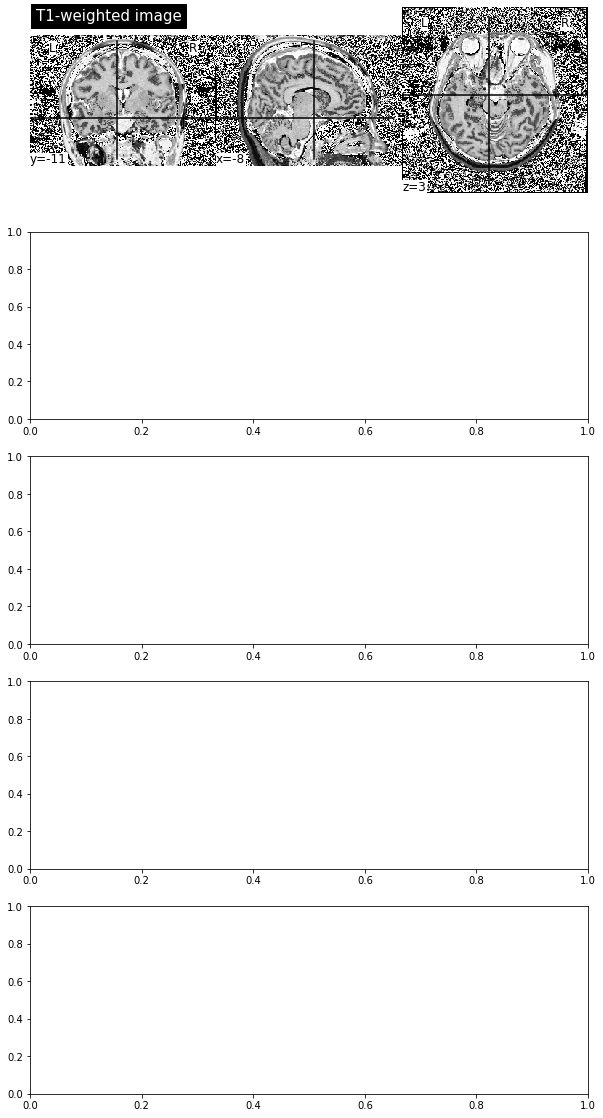

In [38]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

cut_coords = (-8, -11, 3)

plotting.plot_img(memp2rage.t1w_uni, cut_coords, axes=axes[0], cmap=plt.cm.gray, title='T1-weighted image')
plotting.plot_img(memp2rage.t1map, cut_coords, axes=axes[1], cmap=plt.cm.viridis, title='qT1 map', vmin=0, vmax=4000)

plotting.plot_img(memp2rage.t2starw, cut_coords, axes=axes[2], title='T2*-weighted image', cmap=plt.cm.hot)
plotting.plot_img(memp2rage.t2starmap, cut_coords, axes=axes[3], title='qT2* map', cmap=plt.cm.viridis) # , vmin=0, vmax=100
plotting.plot_img(memp2rage.s0, cut_coords, axes=axes[4], title='qS0 map', cmap=plt.cm.gray) # , vmin=0, vmax=4095

You can also write the quantitative maps away to their folder, so you can inspect them with another viewer (FSLeyes/freeview, etc.).

In [10]:
memp2rage.write_files()

TypeError: expected str, bytes or os.PathLike object, not NoneType

Some researchers rather work with the relaxation rate (R2\*), rather than the relaxation time (T2\*). 

The relationship between R2\* and T2\* is very simple:

$R2^* = \frac{1}{T2^*}$

Anyhoo, there is also a `r2starmap`-attribute.

In [11]:
import numpy as np

<string>:1: RuntimeWarning: divide by zero encountered in true_divide
/home/jyao3/.local/lib/python3.6/site-packages/nilearn/plotting/find_cuts.py:68: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  .format(DEFAULT_CUT_COORDS))


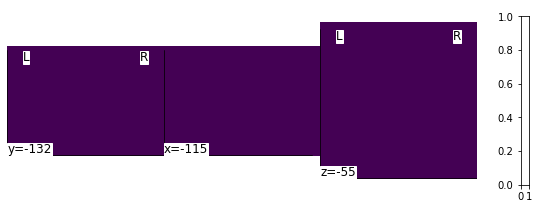

In [12]:
plotting.plot_img(memp2rage.r2starmap, colorbar=True)

You can also save this R2\*-map:

In [13]:
memp2rage.r2starmap.to_filename('/data/sourcedata/sub-02/anat/sub-02_acq-highres0p64ME_R2star.nii.gz')

<string>:1: RuntimeWarning: divide by zero encountered in true_divide
